<a href="https://colab.research.google.com/github/maxigaarp/Gestion-De-Datos-en-R/blob/main/Taller_3_v1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller 3

In [ ]:
install.packages("RSQLite")
install.packages("data.table")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bit’, ‘bit64’, ‘plogr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(RSQLite)
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Calidad de datos y Modelo de entidad relación

Para esta parte del taller vamos a trabajar con la base de datos de la matricula de estudiantes de Educación superior del año 2020

Para ello, vamos a descargar la base de datos y, al mismo tiempo, vamos a descargar el esquema de registro de la tabla, que uno puede encontrar en el siguiente link

http://datos.mineduc.cl/dashboards/20195/descarga-bases-de-datos-matricula-en-educacion-superior/

Opción 1

In [ ]:
system("wget http://datos.mineduc.cl/datasets/193401-matricula-de-educacion-superior-2020.download/")
system("mv /content/index.html /content/matricula_ES_2020.zip")

In [ ]:
unzip("/content/matricula_ES_2020.zip")



In [ ]:
system("gdown --id 1dXpk0MP6eXcgzfsFT4fnwjchecMwrNmZ")


Opción 2

In [ ]:
system("unzip /content/20200706_Matrcula_Ed_Superior_2020_PUBL_MRUN.zip")

In [ ]:
matricula <- read.csv2("20200706_Matrícula_Ed_Superior_2020_PUBL_MRUN.csv")

Lo primero que haremos con este trabajo, será elaborar un modelo entidad-relación. Para ello, debemos investigar el esquema de registro y responder una serie de preguntas:



1.   ¿Qué entidades existen?
2.   ¿Cómo se relacionan estas entidades?
3.   ¿Cuáles son los atributos de cada entidad?
4.   ¿Cuál es la llave de cada entidad?



In [ ]:
str(matricula)

'data.frame':	1221017 obs. of  48 variables:
 $ cat_periodo                   : int  2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 ...
 $ codigo_unico                  : chr  "I155S2C80J2V1" "I143S2C30J2V2" "I143S2C469J2V2" "I19S3C9J1V1" ...
 $ MRUN                          : int  NA NA NA NA NA NA NA NA NA NA ...
 $ GEN_ALU                       : int  1 1 2 1 2 2 2 2 2 1 ...
 $ FEC_NAC_ALU                   : int  199603 200103 200103 200105 200110 199502 199709 199911 200104 200003 ...
 $ rango_edad                    : chr  "20 a 24 años" "15 a 19 años" "15 a 19 años" "15 a 19 años" ...
 $ anio_ing_carr_ori             : int  2020 2020 2020 2020 2020 2019 2019 2020 2020 2019 ...
 $ sem_ing_carr_ori              : int  1 1 1 1 1 1 1 1 1 1 ...
 $ anio_ing_carr_act             : int  2020 2020 2020 2020 2020 2019 2019 2020 2020 2019 ...
 $ sem_ing_carr_act              : int  1 1 1 1 1 1 1 1 1 1 ...
 $ tipo_inst_1                   : chr  "Institutos Profesionales" "Institutos Pro

Para construir nuestra base de datos, ahora queremos determinar la calidad de los mismos y, eliminar o corregir aquellos datos que presenten problemas. Para ello, debemos trabajar cada una de las dimensiones.

La primera dimensión que vamos a evaluar es completitud. Aquí, revisamos los datos que falten en cada dimensión, observando cuantos datos faltan en cada columna. 

In [ ]:
df <-apply(X = is.na(matricula), MARGIN = 2, FUN = mean)
print(df*100)

                   cat_periodo                   codigo_unico 
                    0.00000000                     0.00000000 
                          MRUN                        GEN_ALU 
                    0.11138256                     0.00000000 
                   FEC_NAC_ALU                     rango_edad 
                    0.01187535                     0.00000000 
             anio_ing_carr_ori               sem_ing_carr_ori 
                    0.00000000                     0.00000000 
             anio_ing_carr_act               sem_ing_carr_act 
                    0.00000000                     0.00000000 
                   tipo_inst_1                    tipo_inst_2 
                    0.00000000                     0.00000000 
                   tipo_inst_3                       cod_inst 
                    0.00000000                     0.00000000 
                     nomb_inst                       cod_sede 
                    0.00000000                     0.00

¿Qué una columna presente una cantidad importante de datos faltantes, implica que hay un problema con estos datos?

¿Que datos debiesemos eliminar si o si?

Evaluada la completitud de los atributos, es necesario evaluar la validez de los mismos. Es decir, debemos evaluar si los datos cumplen con sus reglas y definiciones acordes.

Existen definiciones básicas de tipo de datos y definiciones más complejas que se refieren a los valores validos definidos por el creador de la base de datos.


In [ ]:
# Definiciones tipos de datos
# Año número entero
falla <- 0
for(c in matricula$cat_periodo){
  if( typeof(c) != "integer" ){
   falla <- falla +1
  }
}
proporcion <- (falla / length(matricula$cat_periodo)) * 100
print(paste0("la tasa de error es de ", proporcion, "%"))


[1] "la tasa de error es de 0%"


In [ ]:
# Nombre carrera character
falla <-0
for(c in matricula$nomb_carrera){

  if( typeof(c) != "character" ){
    falla <- falla +1
  }
  
}
proporcion = (falla / length(matricula$nomb_carrera)) * 100
print(paste0("la tasa de error es de ", proporcion, "%"))


[1] "la tasa de error es de 0%"


**Actividad:** seleccione otros 3 atributos y revise su validez. Tiene 10 minutos

In [ ]:
# Definiciones de acuerdo al creador de la base de datos

# Genero entre 1 y 2
falla <-0
for(c in matricula$GEN_ALU){
  if(c != 1 & c != 2){
    falla <- falla +1
  }  
}

proporcion = (falla / length(matricula$GEN_ALU)) * 100
print(paste0("la tasa de error es de ", proporcion, "%"))



[1] "la tasa de error es de 0%"


Una forma más directa y mas informativa tambien seria agrupar por GEN_ALU y contar cada tipo.

In [ ]:
matricula %>% group_by(GEN_ALU) %>%
              summarise(n())

GEN_ALU,n()
<int>,<int>
1,568968
2,652049


In [ ]:
# Nivel global institución en categoría

falla <-0
for(c in matricula$nivel_global){
  if(c != "Pregrado" & c != "Postgrado" & c != "Postítulo"){
    falla <- falla +1
  }  
}

proporcion = (falla / length(matricula$nivel_global)) * 100
print(paste0("la tasa de error es de ", proporcion, "%"))

[1] "la tasa de error es de 0%"


Tambien podemos contar los grupos para este caso.

In [ ]:
matricula %>% group_by(nivel_global) %>%
              summarise(n())

nivel_global,n()
<chr>,<int>
Postgrado,45483
Postítulo,23807
Pregrado,1151727


In [ ]:
# Nacimiento tiene sentido

falla <-0
for(c in matricula$FEC_NAC_ALU){
  anio <- c %/% 100
  mes <- c %% 100
  if( !is.na(anio)){
  if(anio < 1920 | anio > 2005 | mes == 0 | mes >= 13){
    falla <- falla +1
  }  
  }
}

proporcion = (falla / length(matricula$FEC_NAC_ALU)) * 100
print(paste0("la tasa de error es de ", proporcion, "%"))



[1] "la tasa de error es de 0.00147418094915959%"


In [ ]:
datanacimiento  <- matricula %>%
          select("FEC_NAC_ALU") %>%
          mutate(NAC_ALU_AGNO= FEC_NAC_ALU %/% 100,
                      NAC_ALU_MES= FEC_NAC_ALU %% 100)
datanacimiento

FEC_NAC_ALU,NAC_ALU_AGNO,NAC_ALU_MES
<int>,<dbl>,<dbl>
199603,1996,3
200103,2001,3
200103,2001,3
200105,2001,5
200110,2001,10
199502,1995,2
199709,1997,9
199911,1999,11
200104,2001,4


In [ ]:
datanacimiento %>% summary()

  FEC_NAC_ALU      NAC_ALU_AGNO   NAC_ALU_MES    
 Min.   :192412   Min.   :1924   Min.   : 1.000  
 1st Qu.:199302   1st Qu.:1993   1st Qu.: 4.000  
 Median :199707   Median :1997   Median : 7.000  
 Mean   :199473   Mean   :1995   Mean   : 6.604  
 3rd Qu.:199911   3rd Qu.:1999   3rd Qu.:10.000  
 Max.   :201911   Max.   :2019   Max.   :12.000  
 NA's   :145      NA's   :145    NA's   :145     

Notese el año de nacimiento 2019

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 145 rows containing non-finite values (stat_bin).”


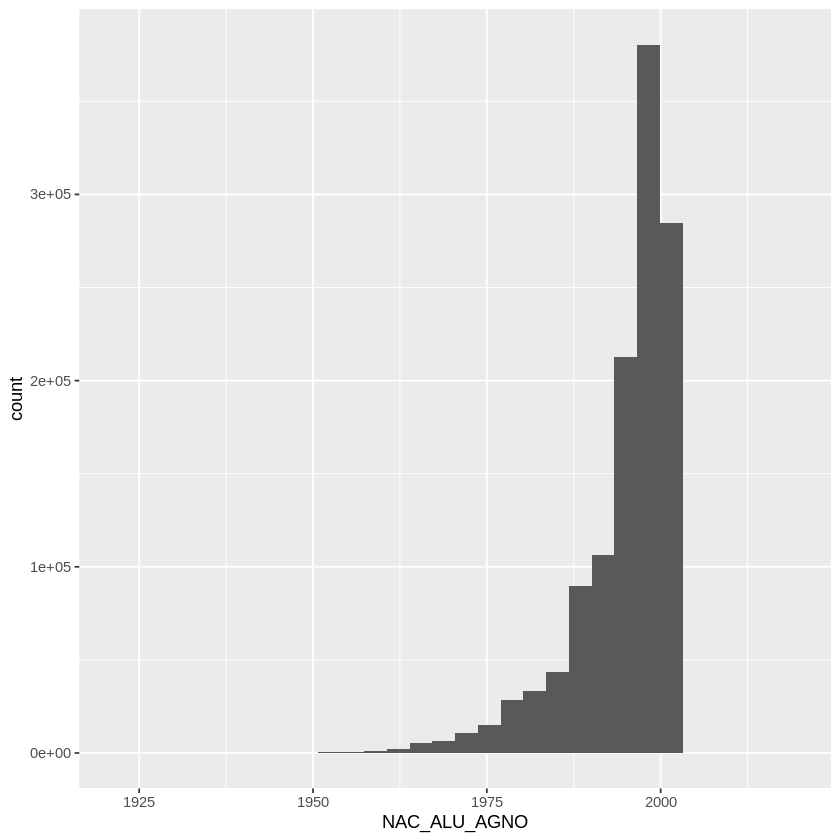

In [ ]:
datanacimiento %>% ggplot(aes(x = NAC_ALU_AGNO)) +
                geom_histogram(aes())


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 145 rows containing non-finite values (stat_bin).”


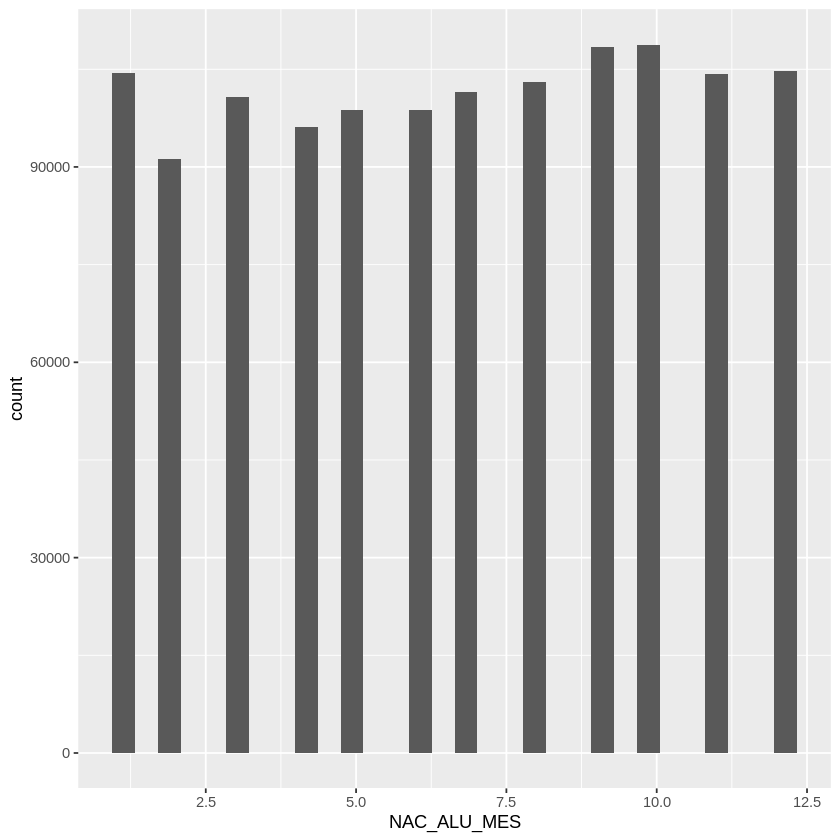

In [ ]:
datanacimiento %>% ggplot(aes(x = NAC_ALU_MES)) +
                geom_histogram(aes())


Busquemos los valores malos


In [ ]:
matricula %>% filter(FEC_NAC_ALU>200601)

cat_periodo,codigo_unico,MRUN,GEN_ALU,FEC_NAC_ALU,rango_edad,anio_ing_carr_ori,sem_ing_carr_ori,anio_ing_carr_act,sem_ing_carr_act,⋯,oecd_area,oecd_subarea,area_carrera_generica,acreditada_carr,acreditada_inst,acre_inst_desde_hasta,acre_inst_anio,costo_proceso_titulacion,costo_obtencion_titulo_diploma,forma_ingreso
<int>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>
2020,I10S9C7J1V1,1847609,2,200912,SIN INFORMACION,2020,1,2020,1,⋯,Humanidades y Artes,Artes,"Música, Canto o Danza",NO ACREDITADA,ACREDITADA,20/05/2015 AL 20/05/2020,5,0,178000,10- Otras formas de Ingreso
2020,I10S9C7J1V1,3257661,1,201110,SIN INFORMACION,2019,1,2019,1,⋯,Humanidades y Artes,Artes,"Música, Canto o Danza",NO ACREDITADA,ACREDITADA,20/05/2015 AL 20/05/2020,5,0,178000,10- Otras formas de Ingreso
2020,I10S9C7J1V1,10354472,1,200608,SIN INFORMACION,2019,1,2019,1,⋯,Humanidades y Artes,Artes,"Música, Canto o Danza",NO ACREDITADA,ACREDITADA,20/05/2015 AL 20/05/2020,5,0,178000,10- Otras formas de Ingreso
2020,I10S9C7J1V1,11090206,1,200901,SIN INFORMACION,2019,1,2019,1,⋯,Humanidades y Artes,Artes,"Música, Canto o Danza",NO ACREDITADA,ACREDITADA,20/05/2015 AL 20/05/2020,5,0,178000,10- Otras formas de Ingreso
2020,I10S9C7J1V1,14259301,1,200703,SIN INFORMACION,2019,1,2019,1,⋯,Humanidades y Artes,Artes,"Música, Canto o Danza",NO ACREDITADA,ACREDITADA,20/05/2015 AL 20/05/2020,5,0,178000,10- Otras formas de Ingreso
2020,I10S9C4J1V1,14398260,2,200703,SIN INFORMACION,2019,1,2019,1,⋯,Humanidades y Artes,Artes,"Música, Canto o Danza",NO ACREDITADA,ACREDITADA,20/05/2015 AL 20/05/2020,5,0,178000,10- Otras formas de Ingreso
2020,I23S1C253J1V1,14854031,2,201801,SIN INFORMACION,2018,2,2018,2,⋯,"Ingeniería, Industria y Construcción",Ingeniería y Profesiones Afines,"Ingeniería Civil, plan común y licenciatura en Ciencias de la Ingeniería",NO ACREDITADA,ACREDITADA,18/11/2015 AL 18/11/2020,5,0,0,2- Continuidad desde plan común o Bachillerato.
2020,I10S9C4J1V1,14940030,2,200610,SIN INFORMACION,2020,1,2020,1,⋯,Humanidades y Artes,Artes,"Música, Canto o Danza",NO ACREDITADA,ACREDITADA,20/05/2015 AL 20/05/2020,5,0,178000,10- Otras formas de Ingreso
2020,I10S9C4J1V1,17034427,2,200807,SIN INFORMACION,2017,1,2017,1,⋯,Humanidades y Artes,Artes,"Música, Canto o Danza",NO ACREDITADA,ACREDITADA,20/05/2015 AL 20/05/2020,5,0,178000,10- Otras formas de Ingreso


**Actividad**: Lea en el esquema de registro diferentes reglas de validez determinadas para estos datos, y revise la validez de dos de ellos. 

Otra evaluación importante es de consistencia y realizar las ediciones. Para ello, revisaremos la información siguiendo lo dicho por el esquema de registro.




In [ ]:
# Duracion total carrera mayor que la duración estudio de la carera
falla <-0
i <- 1
largo <- length(matricula$dur_total_carr) 
while(i < largo){
  if(matricula$dur_estudio_carr[i] > matricula$dur_total_carr[i]){
    falla <- falla +1    
    }
  i <- i + 1
}

proporcion <- (falla / length(matricula$dur_total_carr)) * 100
print(paste0("la tasa de error es de ", proporcion, "%"))

[1] "la tasa de error es de 0%"


In [ ]:
# Tipo institución 3 calza con Tipo institución 1

falla <- 0
i <- 1
largo <- length(matricula$tipo_inst_3) 
while(i < largo){
  if(matricula$tipo_inst_1[i] == "Centros de Formación Técnica"){
    if(matricula$tipo_inst_3[i] != "Centros de Formación Técnica" & matricula$tipo_inst_3[i] != "Centros de Formación Técnica Estatales" ){
     falla <- falla +1   
    }
  }
  if(matricula$tipo_inst_1[i] == "Institutos Profesionales"){
    if(matricula$tipo_inst_3[i] != "Institutos Profesionales"){
     falla <- falla +1         
    }
    }
  if(matricula$tipo_inst_1[i] == "Universidades"){
    if(matricula$tipo_inst_3[i] == "Institutos Profesionales" | matricula$tipo_inst_3[i] == "Centros de Formación Técnica" | matricula$tipo_inst_3[i] == "Centros de Formación Técnica Estatales" ){
     falla <- falla +1         
    }
    }

  i <- i + 1
}

proporcion <- (falla / length(matricula$tipo_inst_3)) * 100
print(paste0("la tasa de error es de ", proporcion, "%"))


[1] "la tasa de error es de 0%"


In [ ]:
matricula %>% group_by(tipo_inst_1,tipo_inst_3) %>%
            summarise(n())

`summarise()` has grouped output by 'tipo_inst_1'. You can override using the `.groups` argument.



tipo_inst_1,tipo_inst_3,n()
<chr>,<chr>,<int>
Centros de Formación Técnica,Centros de Formación Técnica,127194
Centros de Formación Técnica,Centros de Formación Técnica Estatales,3159
Institutos Profesionales,Institutos Profesionales,362030
Universidades,Universidades (* Carrera en Convenio),2359
Universidades,Universidades Estatales CRUCH,193237
Universidades,Universidades Privadas,321635
Universidades,Universidades Privadas CRUCH,211403


In [ ]:
# El rango de edad tiene que calzar con la fecha de nacimiento
falla <- 0
i <- 1
largo <- length(matricula$rango_edad) 
while(i < largo){
  anio <- matricula$FEC_NAC_ALU[i] %/% 100
  edad <- 2020 - anio
  if(matricula$rango_edad[i] == "Entre 15 y 19 años"){
    if(edad > 19 | edad < 15){
      falla <- falla + 1
    }
  }
  if(matricula$rango_edad[i] == "Entre 20 y 24 años"){
    if(edad > 24 | edad < 20){
      falla <- falla + 1
    }
  }
  if(matricula$rango_edad[i] == "Entre 25 y 29 años"){
    if(edad > 29 | edad < 25){
      falla <- falla + 1
    }
  }
  if(matricula$rango_edad[i] == "Entre 30 y 34 años"){
    if(edad > 34 | edad < 30){
      falla <- falla + 1
    }
  }
  if(matricula$rango_edad[i] == "Entre 35 y 39 años"){
    if(edad > 39 | edad < 35){
      falla <- falla + 1
    }
  }
  if(matricula$rango_edad[i] == "40 y más años"){
    if(edad < 39){
      falla <- falla + 1
    }
  }
  if(matricula$rango_edad[i] == "Sin Información"){
    if(!is.na(edad) & edad < 100){
      falla <- falla + 1
    }
 
  }
  i <- i + 1
}

proporcion <- (falla / length(matricula$rango_edad)) * 100
print(paste0("la tasa de error es de ", proporcion, "%"))


[1] "la tasa de error es de 0%"


In [ ]:
datanacimiento  <- matricula %>%
          select("rango_edad", "FEC_NAC_ALU") %>%
          mutate(NAC_ALU_AGNO= FEC_NAC_ALU %/% 100,
                      NAC_ALU_MES= FEC_NAC_ALU %% 100)
datanacimiento

rango_edad,FEC_NAC_ALU,NAC_ALU_AGNO,NAC_ALU_MES
<chr>,<int>,<dbl>,<dbl>
20 a 24 años,199603,1996,3
15 a 19 años,200103,2001,3
15 a 19 años,200103,2001,3
15 a 19 años,200105,2001,5
15 a 19 años,200110,2001,10
25 a 29 años,199502,1995,2
20 a 24 años,199709,1997,9
20 a 24 años,199911,1999,11
15 a 19 años,200104,2001,4


In [ ]:
datanacimiento %>% group_by(rango_edad) %>%
                  summarise(minedad=2020-max(NAC_ALU_AGNO), 
                            maxedad=2020-min(NAC_ALU_AGNO))

rango_edad,minedad,maxedad
<chr>,<dbl>,<dbl>
15 a 19 años,15,20
20 a 24 años,20,25
25 a 29 años,25,30
30 a 34 años,30,35
35 a 39 años,35,40
40 y más años,40,81
SIN INFORMACION,NA,NA


**Actividad:** Encuentre otros dos atributos en que sea necesario realizar ediciones y obtenga la cantidad de datos que presentan errores

## Consultas de bases de datos en R y SQL

Ahora, trabajaremos con la base de datos, almacenando los datos de forma más eficiente y realizando consultas apropiadas, como se vio en clases




In [ ]:
install.packages("data.table")
library(data.table)
install.packages(c("httr", "jsonlite"))
library(httr)
library(jsonlite)
install.packages("tictoc")
library("tictoc")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘jsonlite’


The following object is masked from ‘package:purrr’:

    flatten


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
names(matricula)

[1] "cat_periodo"                    "codigo_unico"                  
 [3] "MRUN"                           "GEN_ALU"                       
 [5] "FEC_NAC_ALU"                    "rango_edad"                    
 [7] "anio_ing_carr_ori"              "sem_ing_carr_ori"              
 [9] "anio_ing_carr_act"              "sem_ing_carr_act"              
[11] "tipo_inst_1"                    "tipo_inst_2"                   
[13] "tipo_inst_3"                    "cod_inst"                      
[15] "nomb_inst"                      "cod_sede"                      
[17] "nomb_sede"                      "cod_carrera"                   
[19] "nomb_carrera"                   "modalidad"                     
[21] "jornada"                        "version"                       
[23] "tipo_plan_carr"                 "dur_estudio_carr"              
[25] "dur_proceso_tit"                "dur_total_carr"                
[27] "region_sede"                    "provincia_sede"                
[29] "comuna_sede"                    "nivel_global"                  
[31] "nivel_carrera_1"                "nivel_carrera_2"               
[33] "requisito_ingreso"              "vigencia_carrera"              
[35] "valor_matricula"                "valor_arancel"                 
[37] "codigo_demre"                   "area_conocimiento"             
[39] "oecd_area"                      "oecd_subarea"                  
[41] "area_carrera_generica"          "acreditada_carr"               
[43] "acreditada_inst"                "acre_inst_desde_hasta"         
[45] "acre_inst_anio"                 "costo_proceso_titulacion"      
[47] "costo_obtencion_titulo_diploma" "forma_ingreso"

In [ ]:

alumnos <- matricula[, c("MRUN", "GEN_ALU", "FEC_NAC_ALU")]
estudia_en <- matricula[,c("MRUN", "cod_inst", "cat_periodo", "rango_edad")] 
cursa <- matricula[,c("MRUN","codigo_unico", "cat_periodo", "rango_edad", "anio_ing_carr_ori", "sem_ing_carr_ori", "anio_ing_carr_act", "sem_ing_carr_act", "forma_ingreso")] 
carrera <- matricula[, c("codigo_unico", "cod_sede", "nomb_sede", "cod_carrera", "nomb_carrera", "modalidad", "jornada", "version", "tipo_plan_carr", "dur_estudio_carr", "dur_proceso_tit", "dur_total_carr", "region_sede", "provincia_sede", "comuna_sede", "nivel_global", "nivel_carrera_1", "nivel_carrera_2", "requisito_ingreso",  "vigencia_carrera", "valor_matricula", "valor_arancel", "codigo_demre", "area_conocimiento", "oecd_area",  "oecd_subarea", "area_carrera_generica", "acreditada_carr", "costo_proceso_titulacion",  "costo_obtencion_titulo_diploma" )]
IES <- matricula[, c("cod_inst","tipo_inst_1", "tipo_inst_2", "tipo_inst_3", "nomb_inst", "acreditada_inst", "acre_inst_desde_hasta", "acre_inst_anio")]
pertenece_a <- matricula[,c( "codigo_unico","cod_inst")]


In [ ]:
# Limpiar eliminando llaves vacíos

# Solo me interesa limpiar MRUN, ¿Por qué?

alumnos <- alumnos[!is.na(alumnos$MRUN), ]
cursa <- cursa[!is.na(cursa$MRUN), ]
estudia_en <- estudia_en[!is.na(estudia_en$MRUN), ]

In [ ]:
#Eliminamos información repetida
alumnos <- unique(alumnos)
carrera <- unique(carrera)
IES <- unique(IES)



In [ ]:
estudia_en <- unique(estudia_en)
cursa <- unique(cursa)
pertenece_a <- unique(pertenece_a)

In [ ]:
cursa

,MRUN,codigo_unico,cat_periodo,rango_edad,anio_ing_carr_ori,sem_ing_carr_ori,anio_ing_carr_act,sem_ing_carr_act,forma_ingreso
,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>
1361,19,I536S0C39J1V1,2020,20 a 24 años,2019,1,2019,1,1- Ingreso Directo (regular)
1362,35,I31S2C41J1V1,2020,20 a 24 años,2017,1,2017,1,1- Ingreso Directo (regular)
1363,43,I70S1C900J1V1,2020,25 a 29 años,2020,1,2020,1,1- Ingreso Directo (regular)
1364,59,I81S5C72J2V1,2020,20 a 24 años,2018,1,2018,1,1- Ingreso Directo (regular)
1365,110,I71S1C46J1V1,2020,25 a 29 años,2014,1,2017,1,2- Continuidad desde plan común o Bachillerato.
1366,150,I69S1C5J1V1,2020,20 a 24 años,2016,1,2016,1,1- Ingreso Directo (regular)
1367,151,I13S6C160J1V1,2020,20 a 24 años,2016,1,2016,1,1- Ingreso Directo (regular)
1368,220,I86S5C76J1V1,2020,30 a 34 años,2015,1,2015,1,1- Ingreso Directo (regular)
1369,222,I312S1C82J4V2,2020,35 a 39 años,2019,2,2019,2,1- Ingreso Directo (regular)


En primer lugar, generaremos una serie de consultas, para tratar de entender la tabla que tenemos

In [ ]:
conn <- dbConnect(RSQLite::SQLite(), "mineduc.db")

In [ ]:
dbWriteTable(conn , name = "IES", 
                  value = IES,
                  row.names = FALSE, overwrite = TRUE )

dbWriteTable(conn , name = "alumnos", 
                  value = alumnos,
                  row.names = FALSE, overwrite = TRUE )
dbWriteTable(conn , name = "carrera", 
                  value = carrera,
                  row.names = FALSE, overwrite = TRUE)

dbWriteTable(conn , name = "estudia_en", 
                  value = estudia_en,
                  row.names = FALSE, overwrite = TRUE)
dbWriteTable(conn , name = "pertenece_a", 
                  value = pertenece_a,
                  row.names = FALSE, overwrite = TRUE)

dbWriteTable(conn , name = "cursa", 
                  value = cursa,
                  row.names = FALSE, overwrite = TRUE)


In [ ]:
# Encuentre el código de institución de la Pontificia Universidad Católica de Chile


dbGetQuery(conn, '
select 
cod_inst , nomb_inst
from IES 
where nomb_inst == "PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE";')


cod_inst,nomb_inst
<int>,<chr>
86,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE


In [ ]:
# Genere una lista con todas las carreras diferentes, y sus nombres, que pertenecen al área OCDE Educación
dbGetQuery(conn, '
select 
codigo_unico, nomb_carrera
from carrera 
where oecd_area == "Educación";')


codigo_unico,nomb_carrera
<chr>,<chr>
I143S2C469J2V2,TECNICO ASISTENTE EN EDUCACION ESPECIAL
I155S2C65J1V1,TECNICO EN EDUCACION PARVULARIA
I71S1C149J1V1,PEDAGOGIA EN HISTORIA Y CIENCIAS SOCIALES / LICENCIATURA EN EDUCACION EN HISTORIA Y CIENCIAS SOCIALES
I80S1C18J1V2,PROFESOR DE EDUCACION FISICA
I143S2C469J1V1,TECNICO ASISTENTE EN EDUCACION ESPECIAL
I155S2C7J2V1,PSICOPEDAGOGIA
I71S1C44J1V1,PEDAGOGIA EN MATEMATICA Y COMPUTACION / LICENCIATURA EN EDUCACION EN MATEMATICA Y COMPUTACION
I70S1C442J1V1,PEDAGOGIA EN EDUCACION MEDIA EN MATEMATICAS Y FISICA
I69S1C261J1V1,PEDAGOGIA EN MATEMATICA


In [ ]:
# Determine todas las sedes que tiene la Universidad Católica
dbGetQuery(conn, '
select 
distinct nomb_sede
from carrera, pertenece_a 
where carrera.codigo_unico = pertenece_a.codigo_unico
AND pertenece_a.cod_inst = 86;')


nomb_sede
<chr>
CAMPUS SAN JOAQUIN
SEDE LO CONTADOR
CASA CENTRAL
CAMPUS ORIENTE
SEDE VILLARRICA


In [ ]:
# Genere una tabla con la cantidad personas pertenecen a cada sede de la Universidad Católica
dbGetQuery(conn, '
select 
nomb_sede, count(cursa.MRUN) as "Alumnos"
from carrera, cursa, pertenece_a 
where  cursa.codigo_unico = carrera.codigo_unico
and carrera.codigo_unico = pertenece_a.codigo_unico
and pertenece_a.cod_inst = 86
group by nomb_sede;')


nomb_sede,Alumnos
<chr>,<int>
CAMPUS ORIENTE,998
CAMPUS SAN JOAQUIN,25218
CASA CENTRAL,8755
SEDE LO CONTADOR,2294
SEDE VILLARRICA,251


In [ ]:
# Genere una tabla de la cantidad de sedes por institución y grafiquela
sedes <- dbGetQuery(conn, '
select 
nomb_inst, count(distinct(carrera.cod_sede)) as "Cantidad_Sedes"
from carrera, IES, pertenece_a 
where  pertenece_a.codigo_unico = carrera.codigo_unico
and pertenece_a.cod_inst = IES.cod_inst 
group by pertenece_a.cod_inst;')
sedes


nomb_inst,Cantidad_Sedes
<chr>,<int>
UNIVERSIDAD GABRIELA MISTRAL,1
UNIVERSIDAD FINIS TERRAE,1
UNIVERSIDAD DIEGO PORTALES,1
UNIVERSIDAD CENTRAL DE CHILE,4
UNIVERSIDAD BOLIVARIANA,9
UNIVERSIDAD PEDRO DE VALDIVIA,5
UNIVERSIDAD MAYOR,10
UNIVERSIDAD ACADEMIA DE HUMANISMO CRISTIANO,2
UNIVERSIDAD SANTO TOMAS,14


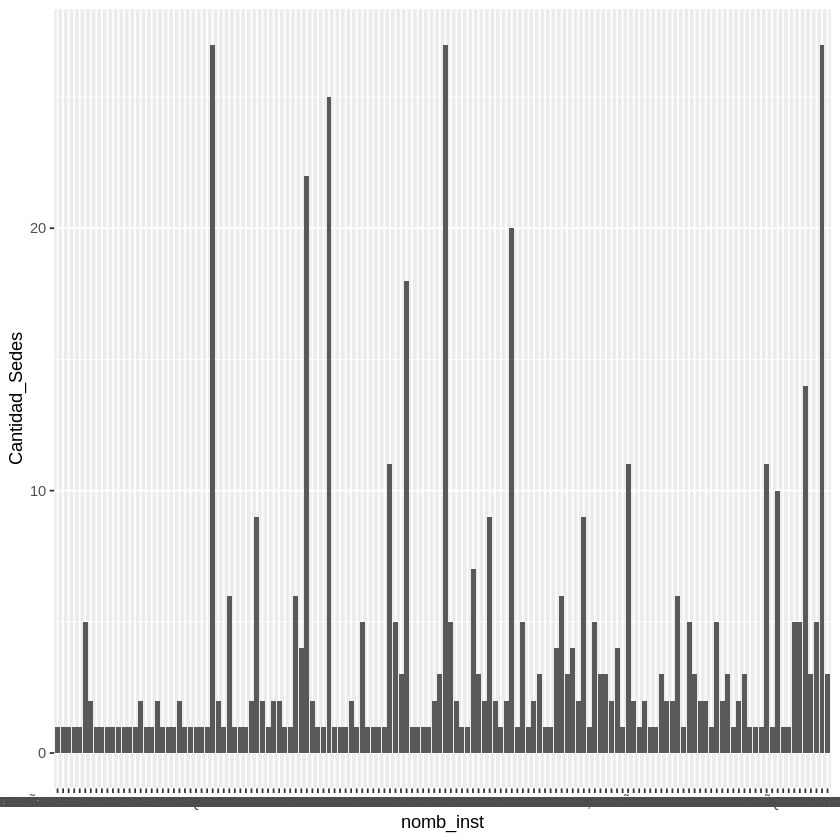

In [ ]:
sedes %>%  ggplot(aes(x=nomb_inst,y=Cantidad_Sedes)) + 
            geom_bar(stat="identity", position="stack")


In [ ]:
# Grafique que regiones tienen mayor cantidad de alumnos
sedes <- dbGetQuery(conn, '
select 
region_sede, count(cursa.MRUN) as "Alumnos_Region"
from carrera, cursa
where  cursa.codigo_unico = carrera.codigo_unico
group by carrera.region_sede;')
sedes

region_sede,Alumnos_Region
<chr>,<int>
Antofagasta,39008
Arica y Parinacota,16757
Atacama,12087
Aysén,2888
Biobío,127683
Coquimbo,42641
La Araucanía,58653
Lib. Gral B. O'Higgins,27265
Los Lagos,42119


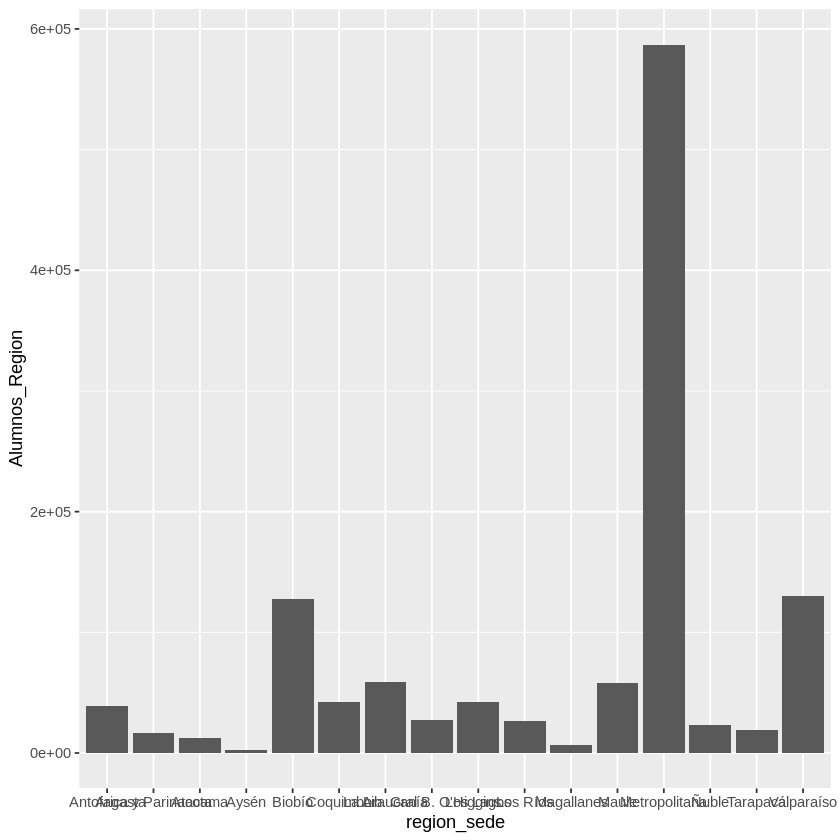

In [ ]:

sedes %>%  ggplot(aes(x=region_sede,y=Alumnos_Region)) + 
            geom_bar(stat="identity", position="stack")